<a href="https://colab.research.google.com/github/ShaneBollinger/Coding-School/blob/main/TCS__Reproductive_Medicine_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question: Can we accurately predict fetal health status using cardiotocographic features?

#Feedback Day 1:
Looking good so far, your next step might be to figure out how to deal with the imbalance in your dataset.


Baseline value – The baby's average heart rate when resting.

Fetal_health – Baby’s health: 1 = normal, 2 = suspect, 3 = bad (pathological).

Accelerations – How often the baby’s heart rate speeds up per second.

Fetal_movement – How often the baby moves per second.

Uterine_contractions – How often the uterus tightens per second.

Light_decelerations – Small drops in the baby’s heart rate per second.

Severe_decelerations – Big, worrying drops in heart rate per second.

Prolonged_decelerations – Long-lasting drops in heart rate per second.

Abnormal_short_term_variability – % of time when heart rate changed in a bad way short-term.

Mean_value_of_short_term_variability – Average short-term changes in heart rate.

Percentage_of_time_with_abnormal_long_term_variability – % of time when heart rate changed abnormally over longer periods.

Mean_value_of_long_term_variability – Average long-term changes in heart rate.

Histogram_width – The difference between the highest and lowest heart rate.

Histogram_min – The lowest heart rate value recorded.

Histogram_max – The highest heart rate value recorded.

Histogram_number_of_peaks – Number of times heart rate hit high points.

Histogram_number_of_zeroes – Number of heart rate values that never occurred.

Histogram_mode – The most common heart rate value.

Histogram_mean – The average heart rate from the histogram.

Histogram_median – The middle heart rate value.

Histogram_median (duplicate) – Same as above (duplicate column).

Histogram_variance – How much the heart rate values spread out.

Histogram_tendency – Whether heart rate values lean high or low.



In [ ]:
#Importing Pandas, KNN, Linear Regression, and Matplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('fetal_health.csv')
#Dataset Statistics
df.describe()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
#Sample row
df.head(1)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0


#Using CTG Features with KNN to Predict Fetal Health


KNN (k=1)
Accuracy: 0.8849765258215962


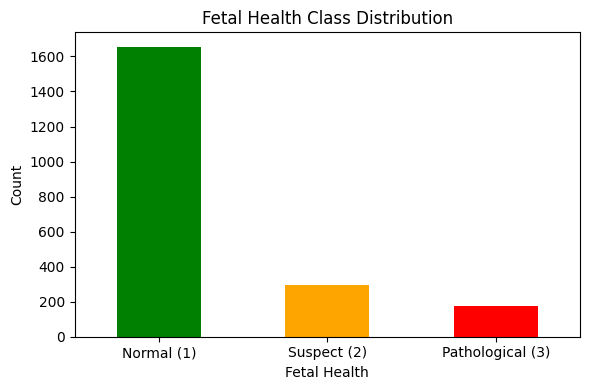

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv('fetal_health.csv')

# Split features and target
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN
print("\nKNN (k=1)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
# Visualize Fetal Health Distribution
plt.figure(figsize=(6, 4))
df['fetal_health'].value_counts().sort_index().plot(kind='bar', color=['green', 'orange', 'red'])
plt.xticks(ticks=[0, 1, 2], labels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'], rotation=0)
plt.title("Fetal Health Class Distribution")
plt.xlabel("Fetal Health")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

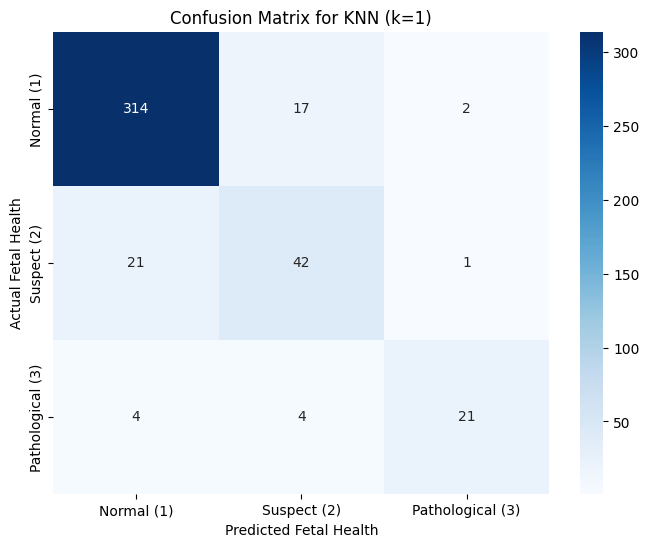

In [ ]:
#Creating Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'], yticklabels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'])
plt.xlabel('Predicted Fetal Health')
plt.ylabel('Actual Fetal Health')
plt.title('Confusion Matrix for KNN (k=1)')
plt.show()